In [1]:
import keras
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

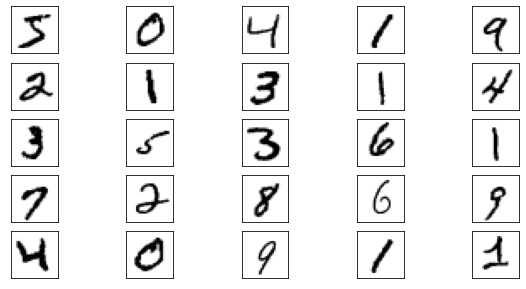

In [3]:
plt.figure(figsize=(10,5))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
plt.show()

In [4]:
from keras.layers import Dense, Flatten, Dropout

model = keras.Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(512, activation='relu'),
    Dropout(0.25),
    Dense(512, activation='relu'),
    Dropout(0.25),
    Dense(10, activation='softmax')
])

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
__________________________________________________

In [5]:
x_train = x_train / 255
x_test = x_test / 255

In [6]:
from tensorflow.keras.utils import to_categorical

y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

In [7]:
model.compile(optimizer='adam',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [8]:
model.fit(x_train, y_train_cat, batch_size=32, epochs=50,
validation_split=0.2)

Epoch 1/50
1500/1500 [==============================] - 11s 7ms/step - loss: 0.2476 - accuracy: 0.9236 - val_loss: 0.1172 - val_accuracy: 0.9639
Epoch 2/50
1500/1500 [==============================] - 10s 7ms/step - loss: 0.1206 - accuracy: 0.9632 - val_loss: 0.1004 - val_accuracy: 0.9687
Epoch 3/50
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0908 - accuracy: 0.9714 - val_loss: 0.0927 - val_accuracy: 0.9722
Epoch 4/50
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0767 - accuracy: 0.9759 - val_loss: 0.0952 - val_accuracy: 0.9739
Epoch 5/50
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0673 - accuracy: 0.9791 - val_loss: 0.0836 - val_accuracy: 0.9751
Epoch 6/50
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0592 - accuracy: 0.9819 - val_loss: 0.0899 - val_accuracy: 0.9758
Epoch 7/50
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0512 - accuracy: 0.9839 - val_loss: 0.0908 - val_ac

In [9]:
model.evaluate(x_test, y_test_cat)

313/313 [==============================] - 1s 3ms/step - loss: 0.1352 - accuracy: 0.9832


[0.13518865406513214, 0.9832000136375427]

In [15]:
import numpy as np

n = 1
x = np.expand_dims(x_test[n], axis=0)
res = model.predict(x)
print(res)

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


In [16]:
print(np.argmax(res))

2


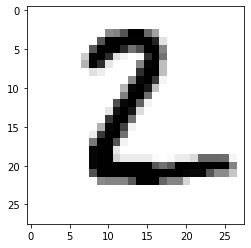

In [17]:
plt.imshow(x_test[n], cmap=plt.cm.binary)
plt.show()

In [18]:
pred = model.predict(x_test)
pred = np.argmax(pred, axis=1)
print(pred.shape)
print(pred[:20])
print(y_test[:20])

(10000,)
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


[ True  True  True  True  True  True  True  True  True  True]
(168, 28, 28)
Значение сети: 7


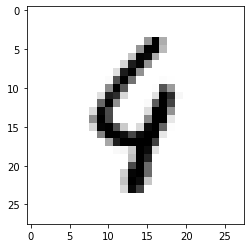

Значение сети: 2


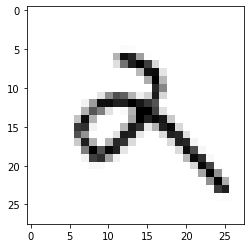

Значение сети: 1


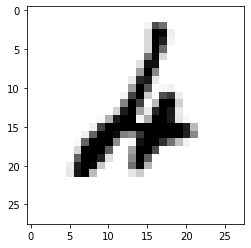

Значение сети: 0


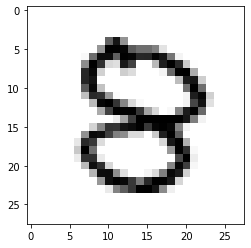

Значение сети: 4


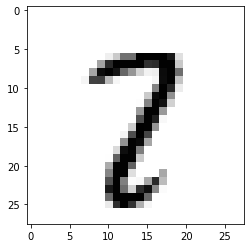

In [20]:
mask = pred == y_test
print(mask[:10])
x_false = x_test[~mask]
y_false = y_test[~mask]
print(x_false.shape)
for i in range(5):
    print('Значение сети: ' + str(y_test[i]))
    plt.imshow(x_false[i], cmap=plt.cm.binary)
    plt.show()